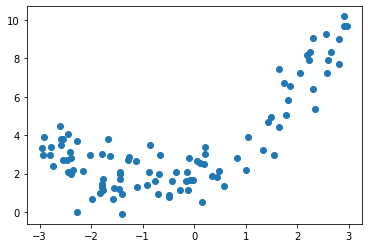

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
m = 100 
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.show()


In [90]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=10, include_bias=False) # la aproximación del degree puede llevar a overfitting
X_poly = poly_features.fit_transform(X)

In [91]:
# fit a linear reg con el polinomio generado
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.92106683]),
 array([[ 3.04687201e-01,  3.30126950e-01,  1.06375984e-01,
          1.38726324e-01,  1.68643970e-01, -1.27992266e-02,
         -4.59777701e-02, -1.80358959e-03,  3.05099710e-03,
          2.03034495e-04]]))

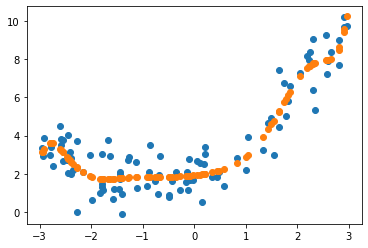

In [92]:
y_pred = lin_reg.predict(X_poly)
plt.scatter(X,y)
plt.scatter(X,y_pred)
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

In [144]:
def plot_learning_curves(model, X, y): 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], [] 
    for m in range(1, len(X_train)): 
        model.fit(X_train[:m], y_train[:m]) 
        y_train_predict = model.predict(X_train[:m]) 
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) 
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.axis([0, len(X_train), 0, 5])
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()


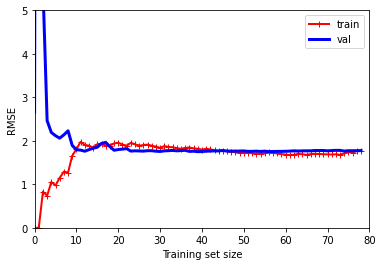

In [145]:
plot_learning_curves(lin_reg, X, y)# generalización hecha por una regresión lineal- 

In [146]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), ("lin_reg", LinearRegression())
])

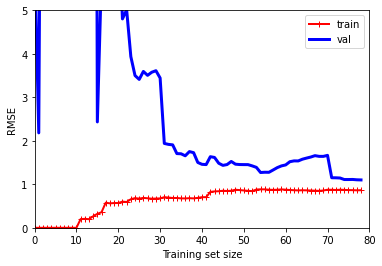

In [147]:
plot_learning_curves(polynomial_regression, X, y)